# 설비효과 추정

## Data Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("./data/wafer/실습 데이터 (path data).xlsx", sheet_name="population")
sample = pd.read_excel("./data/wafer/실습 데이터 (path data).xlsx", sheet_name="sample")
df

,Process 1,Process 2,Process 3,Process 4,Process 5,Process 6,Process 7,Process 8,Yield
0,1,1,1,1,1,1,1,1,84.516824
1,1,1,1,1,1,1,1,2,86.059395
2,1,1,1,1,1,1,1,3,86.620403
3,1,1,1,1,1,1,2,1,84.342478
4,1,1,1,1,1,1,2,2,82.356679
...,...,...,...,...,...,...,...,...,...
6556,3,3,3,3,3,3,2,2,85.256023
6557,3,3,3,3,3,3,2,3,73.936457
6558,3,3,3,3,3,3,3,1,85.864868
6559,3,3,3,3,3,3,3,2,84.655892


## Data Check

In [3]:
df.drop("Yield", axis=1).apply(pd.Series.unique)

,Process 1,Process 2,Process 3,Process 4,Process 5,Process 6,Process 7,Process 8
0,1,1,1,1,1,1,1,1
1,2,2,2,2,2,2,2,2
2,3,3,3,3,3,3,3,3


In [4]:
3**8

6561

-----------------

## 주효과 Main effect
* Process 1 ~ 8의 각 머신 1 ~ 3 의 주효과

In [5]:
process_list = list(df.columns[:-1])
process_list

['Process 1',
 'Process 2',
 'Process 3',
 'Process 4',
 'Process 5',
 'Process 6',
 'Process 7',
 'Process 8']

In [6]:
# 각 process의 머신 별 평균 수율
process_dict = {}
for process in process_list:
    mean_df = df.groupby(process)["Yield"].mean()
    mean_df = mean_df.reset_index()
    process_dict[process] = mean_df

In [7]:
for process_id in process_list:
    display(process_dict[process_id])

,Process 1,Yield
0,1,82.653723
1,2,82.425581
2,3,79.994421


,Process 2,Yield
0,1,82.469903
1,2,81.011629
2,3,81.592192


,Process 3,Yield
0,1,82.144433
1,2,81.404593
2,3,81.524699


,Process 4,Yield
0,1,80.682955
1,2,82.194763
2,3,82.196006


,Process 5,Yield
0,1,80.464640
1,2,83.062150
2,3,81.546935


,Process 6,Yield
0,1,82.518389
1,2,79.013837
2,3,83.541499


,Process 7,Yield
0,1,82.264698
1,2,82.900319
2,3,79.908707


,Process 8,Yield
0,1,83.642175
1,2,82.759806
2,3,78.671744


### 각 머신 별 주효과 
* 전체 평균 - 프로세스의 머신 별 평균  

In [8]:
# 전체 수율 평균
total_mean = df["Yield"].mean()


# 각 process의 머신 별 주효과
machine_main_effect = {}
for process in process_list:
    process_dict[process]["Main Effect"] = 0    # Main Effect 컬럼 생성 및 초기화
    for i in range(3):
        machine_me = process_dict[process].iloc[i, 1] - total_mean
        process_dict[process].iloc[i, -1] = machine_me

,Process 1,Yield,Main Effect
0,1,82.653723,0.962481
1,2,82.425581,0.734339
2,3,79.994421,-1.696821


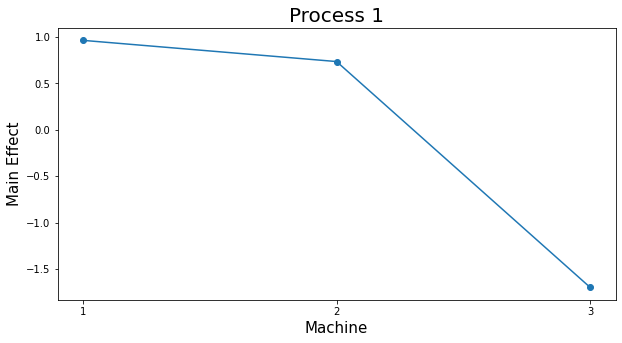

,Process 2,Yield,Main Effect
0,1,82.469903,0.778662
1,2,81.011629,-0.679612
2,3,81.592192,-0.099050


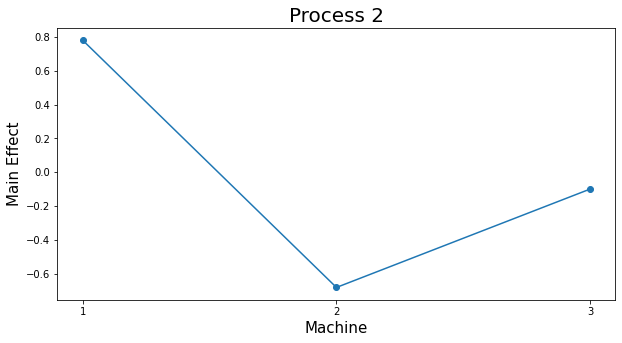

,Process 3,Yield,Main Effect
0,1,82.144433,0.453191
1,2,81.404593,-0.286649
2,3,81.524699,-0.166542


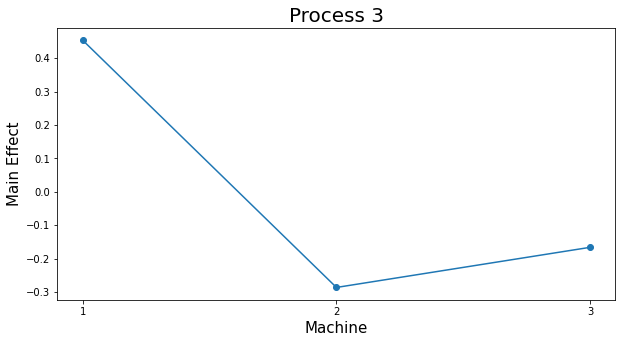

,Process 4,Yield,Main Effect
0,1,80.682955,-1.008287
1,2,82.194763,0.503522
2,3,82.196006,0.504765


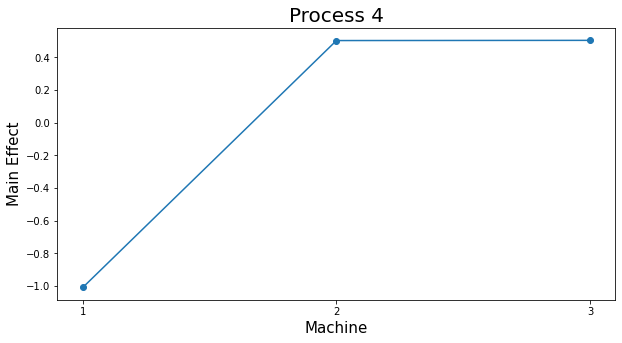

,Process 5,Yield,Main Effect
0,1,80.464640,-1.226602
1,2,83.062150,1.370908
2,3,81.546935,-0.144306


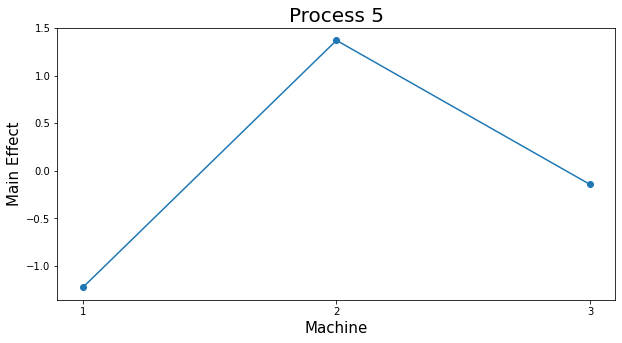

,Process 6,Yield,Main Effect
0,1,82.518389,0.827147
1,2,79.013837,-2.677404
2,3,83.541499,1.850257


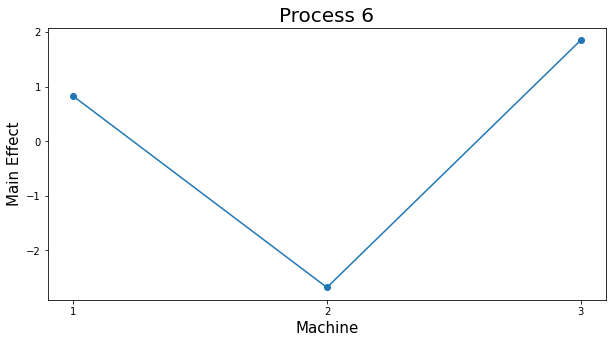

,Process 7,Yield,Main Effect
0,1,82.264698,0.573457
1,2,82.900319,1.209078
2,3,79.908707,-1.782534


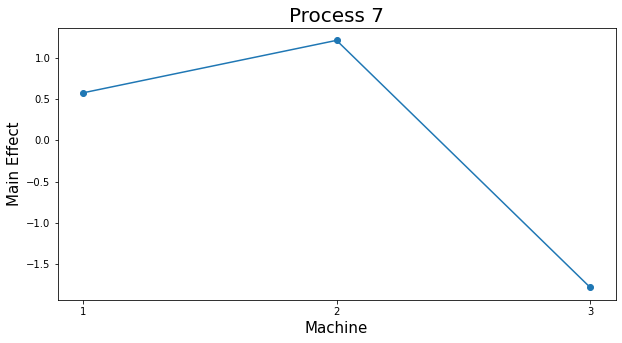

,Process 8,Yield,Main Effect
0,1,83.642175,1.950933
1,2,82.759806,1.068565
2,3,78.671744,-3.019498


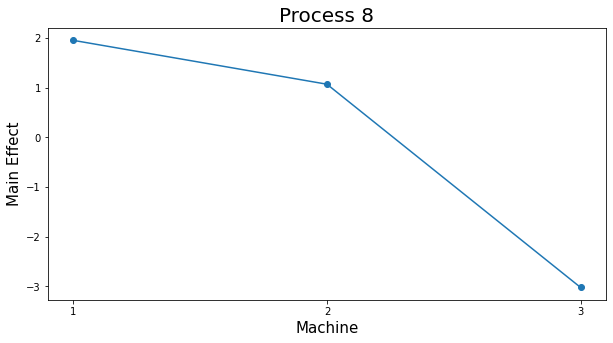

In [9]:
for idx, process_id in enumerate(process_list):
    display(process_dict[process_id])
    
    # Graph part
    plt.figure(figsize=(10, 5))
    plt.plot(process_dict[process_id][process_id], process_dict[process_id]["Main Effect"], marker="o")
    
    plt.title(process_id, fontdict={"fontsize":20})
    
    plt.xlabel("Machine", fontdict={"fontsize":15})
    plt.xticks(np.arange(1,4,1))
    
    plt.ylabel("Main Effect", fontdict={"fontsize":15})
    
    plt.show()

## 교호작용 효과 Interaction Effect

In [10]:
# 교호작용 효과 데이터 프레임
total_ie = pd.DataFrame(np.zeros((24, 24)), index=range(24), columns=range(24))

# Path 는 process를 역행하지 않기 때문에 조합 형태로 교호작용 산출
for i in range(len(process_list)-1):
    for ik in range(3):
        for j in range(i+1, len(process_list)):
            for jk in range(3):
                # 각 프로세스의 머신 별 수율 평균
                mean_yield = df[(df.loc[:, process_list[i]]==ik+1) & \
                                (df.loc[:, process_list[j]]==jk+1)]["Yield"].mean()
                each_ie = mean_yield - (total_mean+process_dict[process_list[i]].iloc[ik, -1]\
                                        +process_dict[process_list[j]].iloc[jk, -1])
                total_ie.iloc[(int(process_list[i][-1])-1)*3+ik, (int(process_list[j][-1])-1)*3+jk] = each_ie

In [11]:
total_ie

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.165879,0.322254,-0.488134,0.156074,-0.343632,0.187558,-0.062452,...,-0.359598,0.085293,0.960532,-1.045825,-0.057081,-0.097664,0.154745,-0.644442,0.004846,0.639596
1,0.0,0.0,0.0,-0.011820,-0.020549,0.032370,-0.310721,0.548161,-0.237440,0.429158,...,0.003429,-0.086392,-1.549173,1.635565,0.169530,0.140703,-0.310233,0.229895,-0.735736,0.505841
2,0.0,0.0,0.0,-0.154059,-0.301705,0.455764,0.154647,-0.204529,0.049882,-0.366706,...,0.356168,0.001099,0.588641,-0.589740,-0.112449,-0.043039,0.155488,0.414547,0.730891,-1.145437
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.651786,0.381551,0.270235,-0.077882,...,1.451049,1.015210,-0.264390,-0.750820,0.346949,-0.598118,0.251169,-0.259271,-0.552076,0.811347
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.814528,-0.608428,-1.206100,-0.626945,...,-0.744770,-0.461041,0.363054,0.097987,-0.960025,1.045962,-0.085937,0.429076,0.281789,-0.710865
5,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1.162742,0.226877,0.935866,0.704826,...,-0.706279,-0.554170,-0.098664,0.652833,0.613076,-0.447844,-0.165232,-0.169805,0.270287,-0.100482
6,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.472624,...,1.333581,0.168809,1.101027,-1.269835,-0.278386,0.570934,-0.292549,-0.536484,1.122170,-0.585686
7,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.933924,...,-1.244056,-0.303485,-0.138910,0.442396,-0.327556,0.282348,0.045207,-0.009729,-1.150584,1.160313
8,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.461300,...,-0.089525,0.134677,-0.962116,0.827440,0.605941,-0.853283,0.247342,0.546213,0.028413,-0.574626
9,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.101121,0.165788,-0.471533,0.305746,0.229451,-0.993646,0.764195,-0.122090,0.010300,0.111790


### Index, Columns Rename

In [12]:
cols = []
for p_id in process_list:
    for m_id in range(1, 4):
        cols.append(f"{p_id[-1]} {m_id}")
        
total_ie.columns = cols
total_ie.index = cols

total_ie.columns = pd.MultiIndex.from_tuples([(x.split()[0], x.split()[1]) for x in cols])
total_ie.index = pd.MultiIndex.from_tuples([(x.split()[0], x.split()[1]) for x in cols])

In [13]:
total_ie

1                   2                             3            \
       1    2    3         1         2         3         1         2   
1 1  0.0  0.0  0.0  0.165879  0.322254 -0.488134  0.156074 -0.343632   
  2  0.0  0.0  0.0 -0.011820 -0.020549  0.032370 -0.310721  0.548161   
  3  0.0  0.0  0.0 -0.154059 -0.301705  0.455764  0.154647 -0.204529   
2 1  0.0  0.0  0.0  0.000000  0.000000  0.000000 -0.651786  0.381551   
  2  0.0  0.0  0.0  0.000000  0.000000  0.000000  1.814528 -0.608428   
  3  0.0  0.0  0.0  0.000000  0.000000  0.000000 -1.162742  0.226877   
3 1  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
  2  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
  3  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
4 1  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
  2  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
  3  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
5 1  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
  2  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
  3  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
6 1  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
  2  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
  3  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
7 1  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
  2  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
  3  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
8 1  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
  2  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
  3  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                      4  ...         5         6                      \
            3         1  ...         3         1         2         3   
1 1  0.187558 -0.062452  ... -0.359598  0.085293  0.960532 -1.045825   
  2 -0.237440  0.429158  ...  0.003429 -0.086392 -1.549173  1.635565   
  3  0.049882 -0.366706  ...  0.356168  0.001099  0.588641 -0.589740   
2 1  0.270235 -0.077882  ...  1.451049  1.015210 -0.264390 -0.750820   
  2 -1.206100 -0.626945  ... -0.744770 -0.461041  0.363054  0.097987   
  3  0.935866  0.704826  ... -0.706279 -0.554170 -0.098664  0.652833   
3 1  0.000000 -0.472624  ...  1.333581  0.168809  1.101027 -1.269835   
  2  0.000000  0.933924  ... -1.244056 -0.303485 -0.138910  0.442396   
  3  0.000000 -0.461300  ... -0.089525  0.134677 -0.962116  0.827440   
4 1  0.000000  0.000000  ...  0.101121  0.165788 -0.471533  0.305746   
  2  0.000000  0.000000  ... -0.242088 -0.330866 -0.430818  0.761684   
  3  0.000000  0.000000  ...  0.140967  0.165079  0.902351 -1.067430   
5 1  0.000000  0.000000  ...  0.000000  0.422490  0.950912 -1.373402   
  2  0.000000  0.000000  ...  0.000000 -0.431775 -0.513319  0.945094   
  3  0.000000  0.000000  ...  0.000000  0.009285 -0.437593  0.428309   
6 1  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
  2  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
  3  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
7 1  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
  2  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
  3  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
8 1  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
  2  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
  3  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   

            7                             8                      
            1         2         3         1         2         3  
1 1 -0.057081 -0.097664  0.154745 -0.644442  0.004846  0.639596  
  2  0.169530  0.140703 -0.310233  0.229895 -0.735736  0.505841

In [14]:
total_ie.loc["1"]["2"]

,1,2,3
1,0.165879,0.322254,-0.488134
2,-0.011820,-0.020549,0.032370
3,-0.154059,-0.301705,0.455764


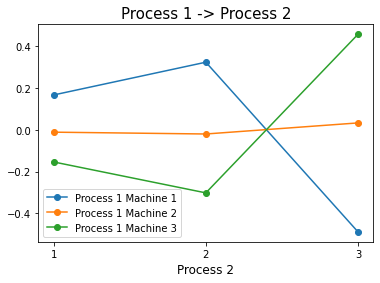

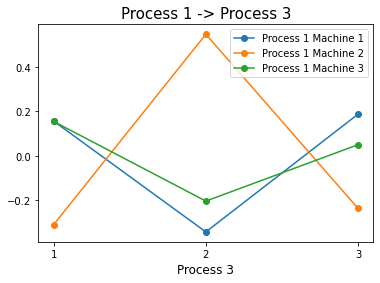

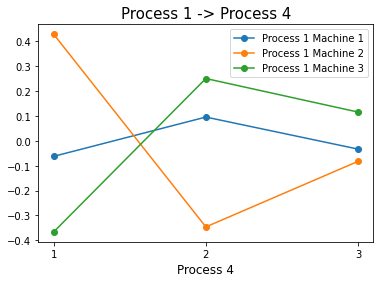

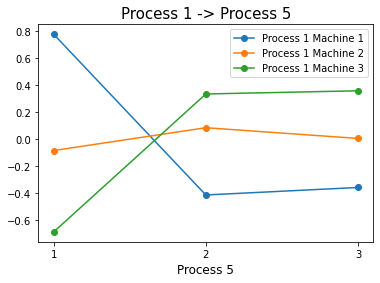

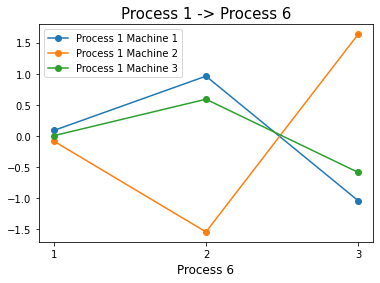

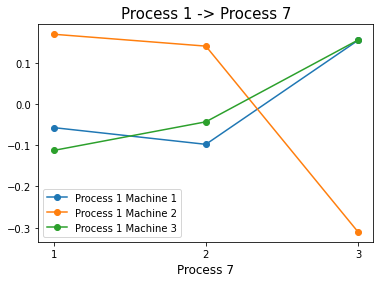

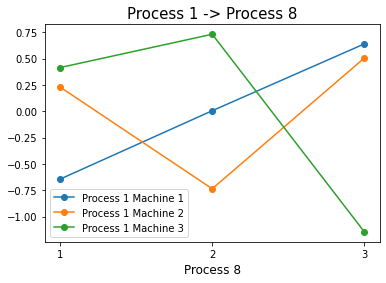

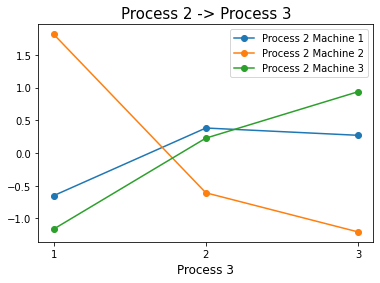

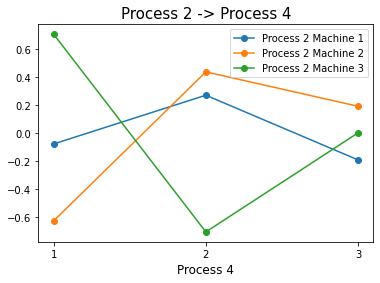

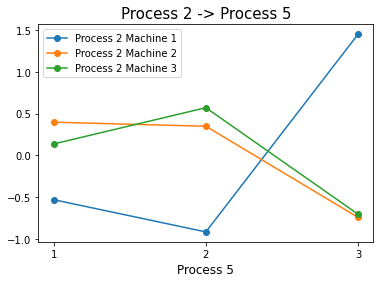

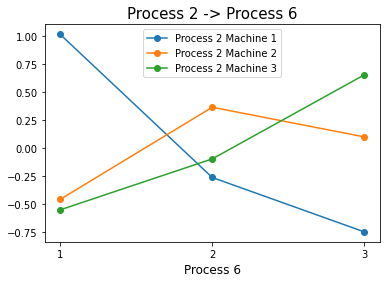

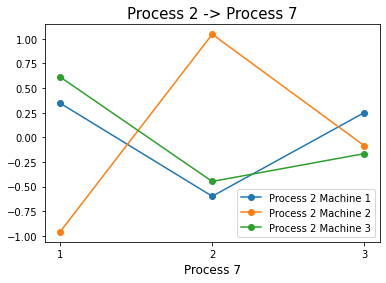

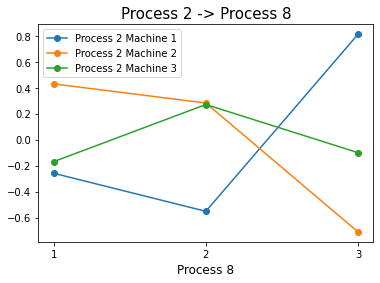

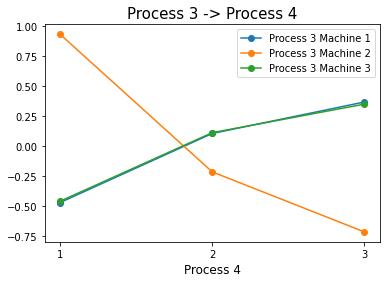

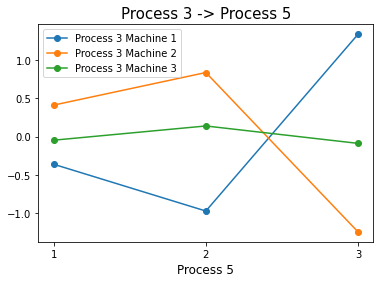

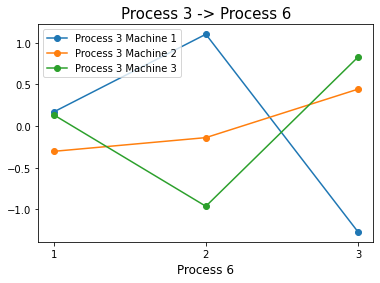

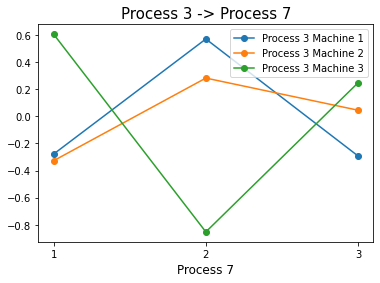

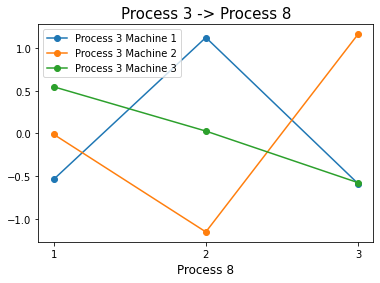

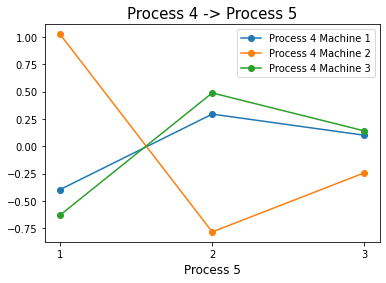

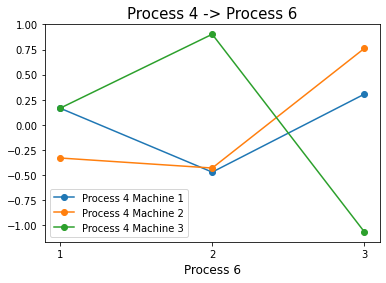

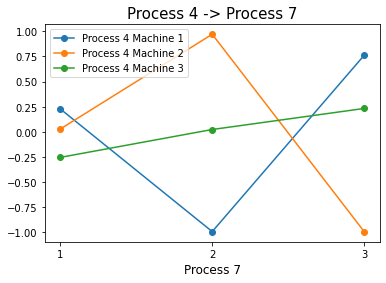

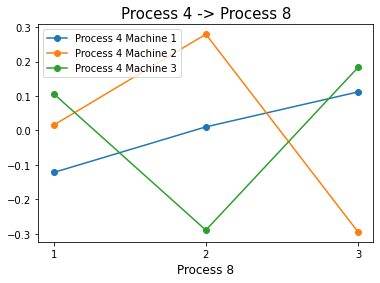

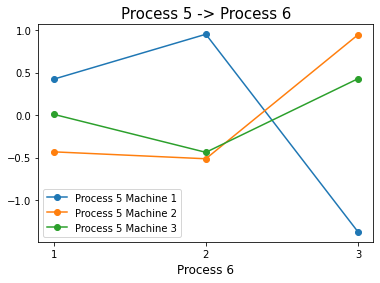

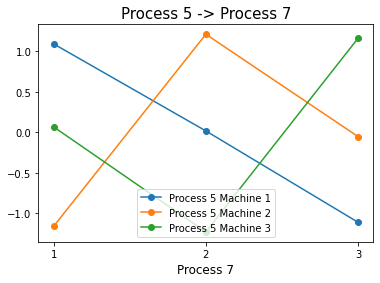

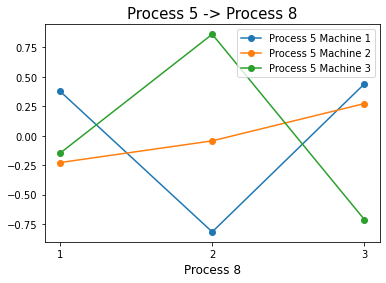

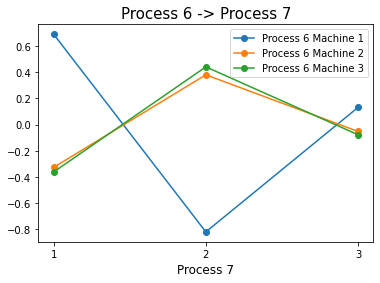

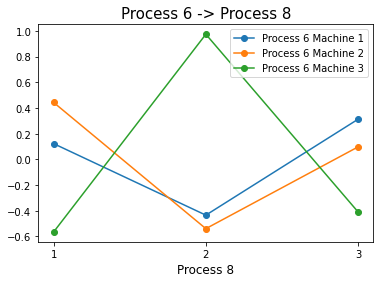

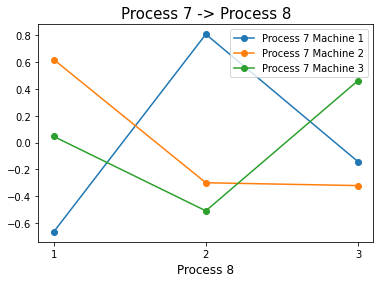

In [15]:
for i in range(len(process_list)-1):
    plt.figure()
    for j in range(i+1, len(process_list)):
        tmp_df = total_ie.loc[str(i+1)][str(j+1)]
        for k in range(3):
            plt.plot(tmp_df.iloc[k], marker="o", label=f"{process_list[i]} Machine {k+1}")
            plt.legend()
            plt.xlabel(f"{process_list[j]}", fontdict={"fontsize":12})
        plt.title(f"{process_list[i]} -> {process_list[j]}", fontdict={"fontsize":15})
        plt.show()

In [16]:
sample.head()

,Process 1,Process 2,Process 3,Process 4,Process 5,Process 6,Process 7,Process 8,Yield
0,3,2,3,2,2,2,2,3,76.800076
1,3,1,3,2,2,1,1,3,80.739891
2,3,2,3,1,2,2,3,1,74.395488
3,1,1,2,2,2,2,1,2,80.463598
4,1,1,2,3,2,3,2,2,88.264303


In [17]:
def split_path(sequence):
    result = []
    temp = sequence[0]
    for i in range(1, len(sequence)):
        temp += sequence[i]
        result.append(temp)
        temp = sequence[i]
    result.append(temp)
    return result[:-1]

In [39]:
split_path("13123112")

['13', '31', '12', '23', '31', '11', '12']

In [18]:
total_ie.head()

1                   2                             3            \
       1    2    3         1         2         3         1         2   
1 1  0.0  0.0  0.0  0.165879  0.322254 -0.488134  0.156074 -0.343632   
  2  0.0  0.0  0.0 -0.011820 -0.020549  0.032370 -0.310721  0.548161   
  3  0.0  0.0  0.0 -0.154059 -0.301705  0.455764  0.154647 -0.204529   
2 1  0.0  0.0  0.0  0.000000  0.000000  0.000000 -0.651786  0.381551   
  2  0.0  0.0  0.0  0.000000  0.000000  0.000000  1.814528 -0.608428   

                      4  ...         5         6                      \
            3         1  ...         3         1         2         3   
1 1  0.187558 -0.062452  ... -0.359598  0.085293  0.960532 -1.045825   
  2 -0.237440  0.429158  ...  0.003429 -0.086392 -1.549173  1.635565   
  3  0.049882 -0.366706  ...  0.356168  0.001099  0.588641 -0.589740   
2 1  0.270235 -0.077882  ...  1.451049  1.015210 -0.264390 -0.750820   
  2 -1.206100 -0.626945  ... -0.744770 -0.461041  0.363054  0.097987   

            7                             8                      
            1         2         3         1         2         3  
1 1 -0.057081 -0.097664  0.154745 -0.644442  0.004846  0.639596  
  2  0.169530  0.140703 -0.310233  0.229895 -0.735736  0.505841  
  3 -0.112449 -0.043039  0.155488  0.414547  0.730891 -1.145437  
2 1  0.346949 -0.598118  0.251169 -0.259271 -0.552076  0.811347  
  2 -0.960025  1.045962 -0.085937  0.429076  0.281789 -0.710865  

[5 rows x 24 columns]

In [19]:
effect_list = []
for i in range(len(sample)):
    sample_yield = sample.iloc[i, -1]
    effect = sample_yield
    
    sequence = ""
    for j in range(8):
        sequence += str(sample.iloc[i, j])
        path = split_path(sequence)
    
    for idx, p in enumerate(path):
        tmp = total_ie.loc[str(idx+1)][str(idx+2)]
        effect += tmp.loc[p[0], p[1]]
    effect_list.append(effect)


In [20]:
sample["Effect"] = effect_list
sample

,Process 1,Process 2,Process 3,Process 4,Process 5,Process 6,Process 7,Process 8,Yield,Effect
0,3,2,3,2,2,2,2,3,76.800076,74.166941
1,3,1,3,2,2,1,1,3,80.739891,80.299989
2,3,2,3,1,2,2,3,1,74.395488,72.201060
3,1,1,2,2,2,2,1,2,80.463598,79.979607
4,1,1,2,3,2,3,2,2,88.264303,89.668340
...,...,...,...,...,...,...,...,...,...,...
323,3,1,1,1,2,1,3,3,78.048247,77.225483
324,3,1,3,3,2,2,1,1,84.388100,83.836625
325,1,2,1,3,3,1,3,1,88.683495,91.515094
326,1,2,2,3,1,1,2,1,85.537773,84.126612


In [29]:
mse = ((sample["Yield"] - sample["Effect"])**2).mean()
rmse = mse**0.5
print(mse, rmse)

2.700847848695312 1.6434256444072277


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(sample["Yield"], sample["Effect"])
rmse = mse**0.5
mae = mean_absolute_error(sample["Yield"], sample["Effect"])
r2 = r2_score(sample["Yield"], sample["Effect"])

print(f"MSE\t: {mse}\nRMSE\t: {rmse}\nMAE\t: {mae}\nr2\t: {r2}")

MSE	: 2.7008478486953114
RMSE	: 1.6434256444072277
MAE	: 1.327468834556447
r2	: 0.8908111777350349
